In [1]:
import pandas as pd

file_name = "heart.csv"
df = pd.read_csv(file_name)
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [2]:
columns_to_drop = ['chol', 'fbs']
df = df.drop(columns=columns_to_drop)
print(df)

     age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  thall  \
0     63    1   3     145        0       150     0      2.3    0    0      1   
1     37    1   2     130        1       187     0      3.5    0    0      2   
2     41    0   1     130        0       172     0      1.4    2    0      2   
3     56    1   1     120        1       178     0      0.8    2    0      2   
4     57    0   0     120        1       163     1      0.6    2    0      2   
..   ...  ...  ..     ...      ...       ...   ...      ...  ...  ...    ...   
298   57    0   0     140        1       123     1      0.2    1    0      3   
299   45    1   3     110        1       132     0      1.2    1    0      3   
300   68    1   0     144        1       141     0      3.4    1    2      3   
301   57    1   0     130        1       115     1      1.2    1    1      3   
302   57    0   1     130        0       174     0      0.0    1    1      2   

     output  
0         1  
1         1

In [3]:
!pip install scikit-learn

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score

In [5]:
# Разделение данных на признаки x и целевую переменную y

X = df.drop('output', axis=1)
y = df['output']

In [6]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
#построение и обучение модели

model=tree.DecisionTreeClassifier(criterion="entropy")
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
#предсказание на тестовой выборке
y_pred=model.predict(X_test_scaled)


In [19]:
# Вывод предсказанных вероятностей
print('Вывод предсказанных вероятностей на тестовой выборке:')
print(y_pred)


Вывод предсказанных вероятностей на тестовой выборке:
[0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0]


In [12]:
# вычисление точности модели
accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.820


In [20]:
#оценка алгоритма
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))



[[27  2]
 [ 9 23]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        29
           1       0.92      0.72      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



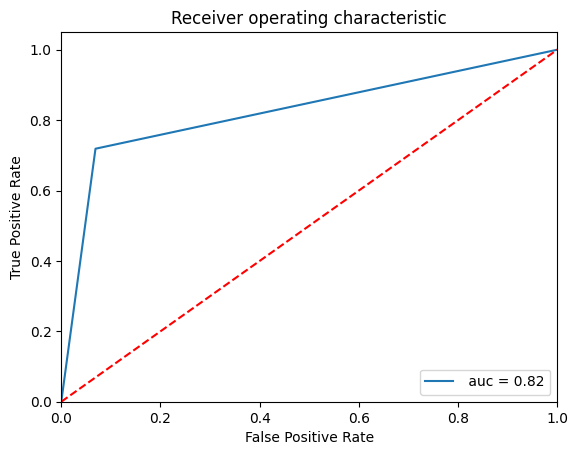

In [25]:
#построение roc кривой
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, model.predict(X_test_scaled))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=' auc = %0.2f' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

[Text(0.5788690476190477, 0.9583333333333334, 'x[2] <= -0.482\nentropy = 0.993\nsamples = 242\nvalue = [109, 133]'),
 Text(0.4017857142857143, 0.875, 'x[9] <= -0.184\nentropy = 0.87\nsamples = 110\nvalue = [78, 32]'),
 Text(0.23214285714285715, 0.7916666666666666, 'x[6] <= 0.401\nentropy = 0.998\nsamples = 53\nvalue = [25, 28]'),
 Text(0.09523809523809523, 0.7083333333333334, 'x[10] <= 0.335\nentropy = 0.691\nsamples = 27\nvalue = [5, 22]'),
 Text(0.047619047619047616, 0.625, 'x[0] <= 0.603\nentropy = 0.286\nsamples = 20\nvalue = [1, 19]'),
 Text(0.023809523809523808, 0.5416666666666666, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.07142857142857142, 0.5416666666666666, 'x[0] <= 0.766\nentropy = 0.65\nsamples = 6\nvalue = [1, 5]'),
 Text(0.047619047619047616, 0.4583333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.09523809523809523, 0.4583333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.14285714285714285, 0.625, 'x[4] <= -0.101\nentrop

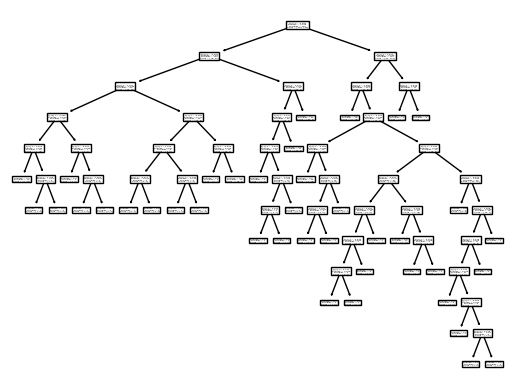

In [26]:
tree.plot_tree(model)